<a href="https://colab.research.google.com/github/Kusumash28/AIML-lab/blob/main/RBFNN_GuassianKernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
# XOR Gate Data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])  # NAND problem

In [3]:
# Gaussian Radial Basis Function (RBF) kernel
def rbf_kernel(x1, x2, sigma=1.0):
    return np.exp(-np.linalg.norm(x1 - x2) ** 2 / (2 * (sigma ** 2)))


In [4]:
# Choose centers using k-means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(X)
centers = kmeans.cluster_centers_

In [5]:
# Calculate the spread parameter

from scipy.spatial.distance import cdist
d_max = np.max(cdist(centers, centers, 'euclidean'))
sigma = d_max / np.sqrt(2 * len(centers))

In [6]:
# Compute the RBF layer output
R = np.zeros((X.shape[0], len(centers)))
for i in range(X.shape[0]):
    for j in range(len(centers)):
        R[i, j] = rbf_kernel(X[i], centers[j], sigma)


In [7]:
# Compute the output weights
W = np.dot(np.linalg.pinv(R), Y)

In [8]:
# Define the RBF network prediction function
def rbf_network(X, centers, sigma, W):
    R = np.zeros((X.shape[0], len(centers)))
    for i in range(X.shape[0]):
        for j in range(len(centers)):
            R[i, j] = rbf_kernel(X[i], centers[j], sigma)
    return np.dot(R, W)

In [9]:
# Make predictions
y_pred = rbf_network(X, centers, sigma, W)

In [10]:
print(y_pred)

[[-3.33066907e-16]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [-4.44089210e-16]]


In [11]:
# Evaluate the model
mse = np.mean(np.square(Y - y_pred))
print("Mean Squared Error:",mse)

Mean Squared Error: 1.8797076257219422e-31


## Activity to do
1. Implement for other kernal fucntion and centers <br>
2. Compare ateleast to kernel fucntion <br>
3. Generate a random data and implement <br>

🔹 Gaussian Kernel - Train Accuracy: 0.9925, Test Accuracy: 0.9900
🔹 Polynomial Kernel - Train Accuracy: 0.9775, Test Accuracy: 0.9900


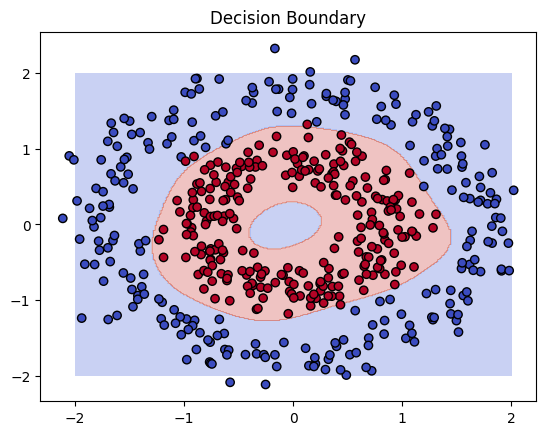

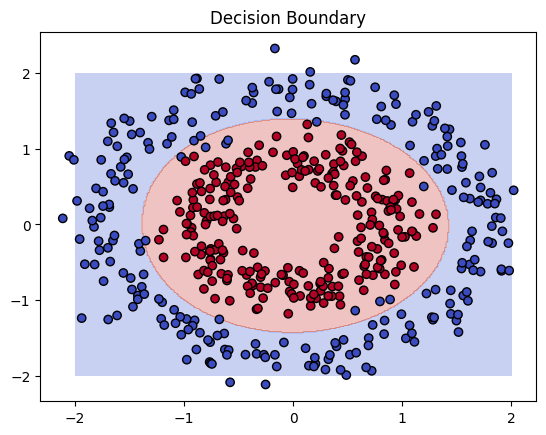

In [12]:
# Step 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Step 2: Generate synthetic non-linear dataset
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Choose RBF centers (random selection from training set)
def choose_centers(X_train, num_centers):
    indices = np.random.choice(len(X_train), num_centers, replace=False)
    return X_train[indices]

# Step 4: RBF Kernels
def gaussian_kernel(X, centers, sigma=1.0):
    return np.exp(-cdist(X, centers, 'sqeuclidean') / (2 * sigma**2))

def polynomial_kernel(X, centers, degree=3, coef0=1):
    return (X @ centers.T + coef0)**degree

# Step 5: Train RBF Network using closed-form solution (like kernel ridge regression)
def train_rbf_network(X_train, y_train, X_test, centers, kernel_func, **kwargs):
    # Convert labels to {-1, 1} for binary classification
    y_bin = 2 * y_train - 1

    # Compute kernel matrix
    Phi_train = kernel_func(X_train, centers, **kwargs)
    Phi_test = kernel_func(X_test, centers, **kwargs)

    # Closed-form weights (pseudo-inverse)
    W = np.linalg.pinv(Phi_train) @ y_bin

    # Predictions
    y_pred_train = np.sign(Phi_train @ W)
    y_pred_test = np.sign(Phi_test @ W)

    # Convert back to {0, 1}
    y_pred_train = (y_pred_train + 1) // 2
    y_pred_test = (y_pred_test + 1) // 2

    return y_pred_train, y_pred_test

# Step 6: Apply both kernels and compare
num_centers = 30
centers = choose_centers(X_train, num_centers)

# Gaussian kernel results
y_train_pred_g, y_test_pred_g = train_rbf_network(X_train, y_train, X_test, centers, gaussian_kernel, sigma=0.5)
acc_train_g = accuracy_score(y_train, y_train_pred_g)
acc_test_g = accuracy_score(y_test, y_test_pred_g)

# Polynomial kernel results
y_train_pred_p, y_test_pred_p = train_rbf_network(X_train, y_train, X_test, centers, polynomial_kernel, degree=3, coef0=1)
acc_train_p = accuracy_score(y_train, y_train_pred_p)
acc_test_p = accuracy_score(y_test, y_test_pred_p)

# Step 7: Print accuracy
print(f"🔹 Gaussian Kernel - Train Accuracy: {acc_train_g:.4f}, Test Accuracy: {acc_test_g:.4f}")
print(f"🔹 Polynomial Kernel - Train Accuracy: {acc_train_p:.4f}, Test Accuracy: {acc_test_p:.4f}")

# Step 8: Visualize decision boundary (optional)
def plot_decision_boundary(X, y, centers, kernel_func, W, **kwargs):
    xx, yy = np.meshgrid(np.linspace(-2, 2, 300), np.linspace(-2, 2, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Phi_grid = kernel_func(grid, centers, **kwargs)
    Z = np.sign(Phi_grid @ W).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

# Visualize for Gaussian
W_g = np.linalg.pinv(gaussian_kernel(X_train, centers, sigma=0.5)) @ (2 * y_train - 1)
plot_decision_boundary(X, y, centers, gaussian_kernel, W_g, sigma=0.5)

# Visualize for Polynomial
W_p = np.linalg.pinv(polynomial_kernel(X_train, centers, degree=3, coef0=1)) @ (2 * y_train - 1)
plot_decision_boundary(X, y, centers, polynomial_kernel, W_p, degree=3, coef0=1)
